In [187]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
#loading data
bli_data = pd.read_csv('../data_for_ml/BLI_03092020113144693.csv')
gdp_data = pd.read_csv('../data_for_ml/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_1307369.csv', 
                       skiprows=[0,1,2,3])
bli_data.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [3]:
#reshaping
useful_bli_data = bli_data[(bli_data['Indicator'] == 'Homicide rate') | 
                           (bli_data['Indicator'] == 'Life satisfaction')][['LOCATION',                                    
                                                                            'Indicator',
                                                                            'Value']]


In [4]:
life_satis = useful_bli_data[useful_bli_data['Indicator'] == 'Life satisfaction'][['LOCATION','Value']]
life_satis = life_satis.rename(columns={'Value':'life_satisfaction'})
homecide_dat = useful_bli_data[useful_bli_data['Indicator'] == 'Homicide rate'][['LOCATION','Value']]
homecide_dat = homecide_dat.rename(columns={'Value':'homecide_rate'})

#life_satis.merge(homecide_dat,how='left',on=['LOCATION','Country'])
print(life_satis['LOCATION'].unique())
print(homecide_dat['LOCATION'].unique())

tmp = life_satis.groupby('LOCATION').mean()
avg_life_satis = tmp.reset_index(level=0)
avg_homecide = homecide_dat.groupby('LOCATION').mean().reset_index(level=0)
df_1 = avg_life_satis.merge(avg_homecide, how='left', on=['LOCATION'])

['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'EST' 'ISR' 'LVA' 'RUS'
 'SVN' 'ZAF' 'OECD' 'COL' 'LTU']
['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'EST' 'ISR' 'LVA' 'RUS'
 'SVN' 'ZAF' 'OECD' 'COL' 'LTU']


In [5]:
gdp_ds = gdp_data[gdp_data['Country Code'].isin(df_1['LOCATION'])][['Country Code','2019']].rename(columns={'2019':'gdp'})
df = df_1.merge(gdp_ds, left_on='LOCATION', right_on='Country Code')

Text(0, 0.5, 'satisfaction_level')

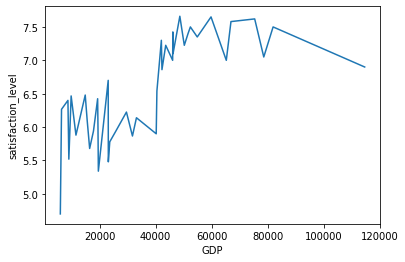

In [6]:
df=df.sort_values(by=['gdp'])
x1 = df['gdp'].values.reshape(-1,1)
x2 = df['homecide_rate']
y  = df['life_satisfaction'].values.reshape(-1,1)
plt.plot(x1,y)
plt.xlabel('GDP')
plt.ylabel('satisfaction_level')

In [7]:
model2 = sklearn.linear_model.LinearRegression()

x = df[['gdp','homecide_rate']].values
model2.fit(x,y)
a = np.arange(200,158000, 2700)[:40]
b =np.arange(0,40)

test_data=np.column_stack((a,b))

In [8]:
pred = np.array([model2.predict([i])[0][0] for i in test_data])
#[test_data[0]]

In [9]:
model1 = sklearn.linear_model.LinearRegression()
x1 = df[['gdp']].values
mx1 = x1.mean()
sdx1 = np.sqrt(np.sum(np.power(x1 - mx1,2))/(x1.shape[0]-1))
z1 = (x1 - mx1)/sdx1
model1.fit(z1,y)
a1 = np.arange(200,158000, 2700)[:40]
pred1 = [model1.predict([[i]])[0][0] for i in a1]

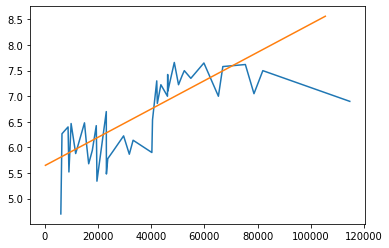

In [10]:
plt.plot(x1,y)
plt.plot(a,pred)
# plt.plot(a,pred1)
plt.show()

### Challenges Of training
1. Insufficient quantity of data.
Very different Machine Learning algorithms, including fairly simple
ones, performed almost identically well on a complex problem of natural language
disambiguation 8 once they were given enough data
2. Non representative data
In order to generalize well, it is crucial that your training data be representative of the
new cases you want to generalize to.
Constraining a model to make it simpler and reduce the risk of overfitting is called
regularization
3. Overfitting
4. Biased

#### Data Snooping Bias
If one selects a model by just looking at the sample of the data then it's likely to be overfitted because we are prone to overfitting.

This is called _data snooping bias_
Such a model will not perform well in production or on the test set.

## Types of ERRORS:

1. RMSE (Root Mean Square Error): $\sqrt{\frac{1}{m} \sum^{m}_{i=1}(h(x^{i})-y^{i})^{2}}$

It is preferred for regression problems but if there are many outliers then we use MAE 
2. Mean Absolute Error (MAE) = $\frac{1}{m}\sum_{i=1}^{m}\mid h(x^{(i)}) - y^{(i)}\mid$ 

In [12]:
housing.info()
housing['ocean_proximity'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


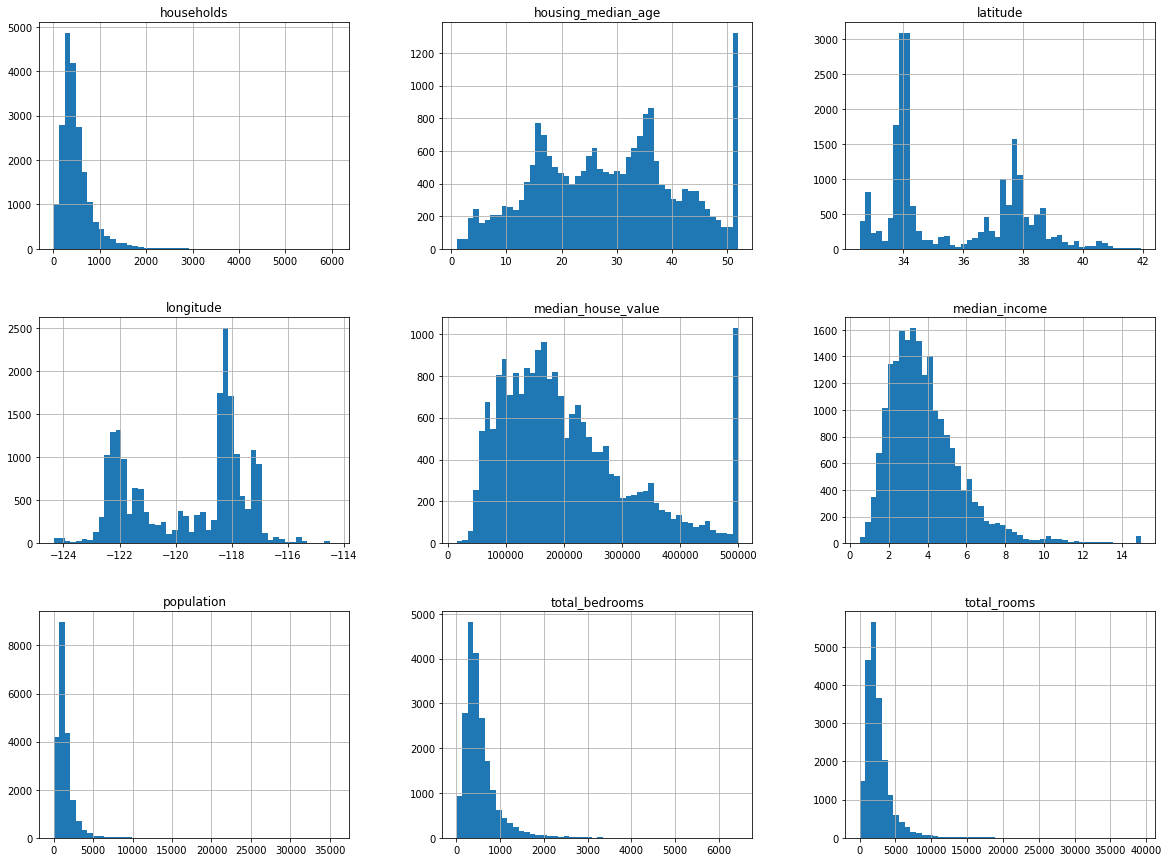

In [14]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
def split_train_test(data,test_ratio):
    shuffled_index = np.random.permutation(len(data))
    ratio_val = int(test_ratio*len(shuffled_index))
    test_set_indices = shuffled_index[:ratio_val]
    train_set_indices = shuffled_index[ratio_val:]
    return data.iloc[train_set_indices],data.iloc[test_set_indices]

<a id="stratified_sampling"></a>
## Types of sampling

1. Stratified Sampling - the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.



In [16]:
housing['median_income']
housing['income_cat'] = pd.cut(housing['median_income'],
                      bins = [0,1.5,3.0,4.5,6,np.inf],
                          labels = [1,2,3,4,5])





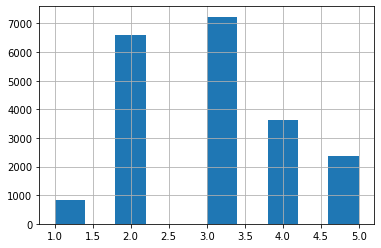

In [17]:
housing['income_cat'].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_train_set['income_cat'].value_counts()/len(strat_test_set)

for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat", axis='columns', inplace=True)



In [20]:
hsDset = strat_train_set

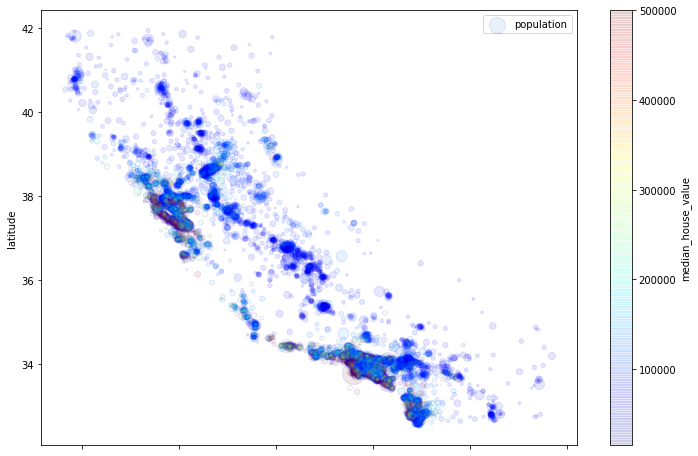

In [21]:
# creating a scatter plot to view the density of the population in an 
# area using latitude and the longitude
# this will form a map like viz of california, since lat/longitude are
# inface x and y axis
hsDset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
           s = housing["population"]/70, label="population",
           c = "median_house_value", cmap=plt.get_cmap("jet"), figsize=(12,8), edgecolors='b')

In [22]:
# calculating the standard correlation coefficient between all attribute
hsDset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


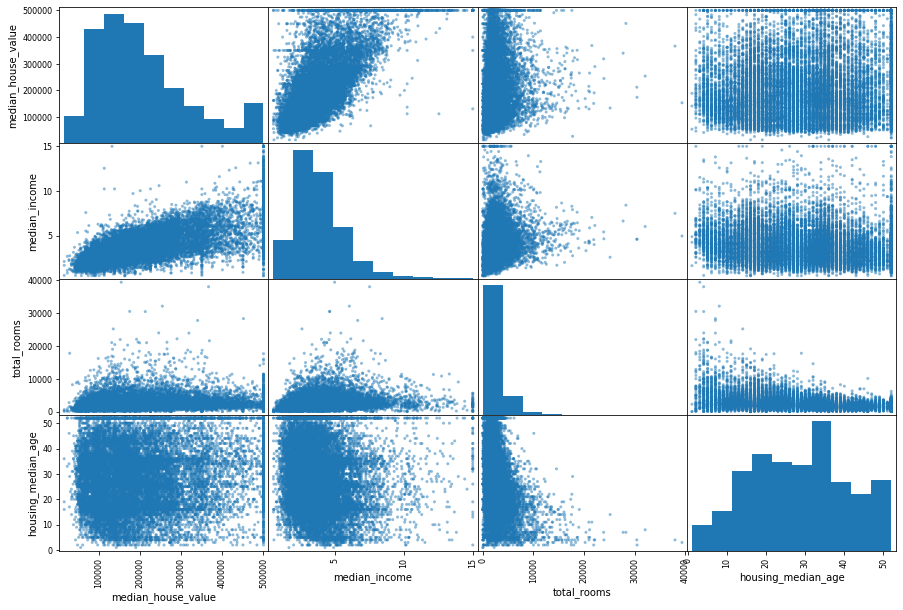

In [23]:
# creating the scatter matrix:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

pd.plotting.scatter_matrix(hsDset[attributes], figsize=(15,10))
print('')

In [24]:
# Attribute Combinations:

hsDset["rooms_per_household"] = hsDset["total_rooms"]/hsDset["households"]
hsDset["bedrooms_per_room"] = hsDset["total_bedrooms"]/hsDset["total_rooms"]
hsDset["population_per_household"] = hsDset["population"]/hsDset["households"]


In [25]:
#colsR = ['median_house_value', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'housing_median_age']
corr_vals = hsDset.corr()
corr_vals['median_house_value']

longitude                  -0.047432
latitude                   -0.142724
housing_median_age          0.114110
total_rooms                 0.135097
total_bedrooms              0.047689
population                 -0.026920
households                  0.064506
median_income               0.687160
median_house_value          1.000000
rooms_per_household         0.146285
bedrooms_per_room          -0.259984
population_per_household   -0.021985
Name: median_house_value, dtype: float64

In [26]:
hs_df_ml = hsDset.drop("median_house_value", axis = 'columns')
hs_df_ml_lab = hsDset['median_house_value'].copy()

hs_df_ml

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,5.505618,0.193878,3.808989


In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
hs_df_ml_num = hs_df_ml.drop("ocean_proximity", axis=1)
imputer.fit(hs_df_ml_num)


SimpleImputer(strategy='median')

In [28]:
X = imputer.transform(hs_df_ml_num)
housing_tr = pd.DataFrame(X, columns=hs_df_ml_num.columns)

In [29]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16512 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
rooms_per_household         16512 non-null float64
bedrooms_per_room           16512 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(11)
memory usage: 1.4 MB


### Scikit-Learn Characterstics

Consistency. All objects share a consistent and simple interface:

1. Estimators. Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is considered a hyperparameter (such as an imputer ’s strategy ), and it must be set as an instance variable (generally via a constructor parameter).

2. Transformers. Some estimators (such as an imputer ) can also transform a dataset; these are called transformers. The transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters. All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform().

3. Predictors. Estimators capable of making predictions given a dataset; they are called predictors. For example, the LinearRegression model. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions given.

4. Inspection. All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy ), and all the estimator’s learned parameters are also accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_ ).

5. Nonproliferation of classes. Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

6. Composition. Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by a final estimator, as we will see.

7. Sensible defaults. Scikit-Learn provides reasonable default values for most parameters, making it easy to create a baseline working system quickly.

### Types of Measurement SCALES

1. __Nominal__ : Just a label used to name or identify people, objects or events.


2. __Ordinal__ : In this scale these numbers represent rank order and indicate the order of quality or quantity, but they do not provide an amount of quantity or degree of quality.


3. __Interval__ : In interval scales, numbers form a continuum and provide information about the amount of difference, but the scale lacks a true zero. The differences between adjacent numbers are equal or known. If zero is used, it simply serves as a reference point on the scale but does not indicate the complete absence of the characteristic being measured. 


4. __Ratio__: Ratio scales have all of the characteristics of interval scales as well as a true zero, which refers to complete absence of the characteristic being measured.

In [30]:
# conversion to ordinal values
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
hs_ord = hs_df_ml[['ocean_proximity']]
ordinal_encoder.fit_transform(hs_ord)

"""
The ML algorithm will assume that 0 and 1 are closer 
but 0 and 4 are more similar from the data. Thus we need 1hot
"""
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [31]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
hs_category = cat_encoder.fit_transform(hs_ord)
print(hs_category)
print(cat_encoder.categories_)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 3)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 1)	1.0
  (16489, 4)	1.0
  (16490, 3)	1.0
  (16491, 0)	1.0
  (16492, 3)	1.0
  (16493, 1)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 3)	1.0
  (16498, 1)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 4)	1.0
  (16503, 0)	1.0
  (16504, 1)	1.0
  (16505, 1)	1.0
  (16506, 0)	1.0
  (16507, 1)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 0)	1.0
  (16511, 3)	1.0
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [158]:
housing_df = pd.read_csv('../data_for_ml/housing.csv')
housing_df.columns
hot_row = housing_df['ocean_proximity']
onc = OneHotEncoder()
hot_row_one_hot = onc.fit_transform(hot_row.values.reshape(-1,1)).toarray()
df_oh = pd.DataFrame(hot_row_one_hot, dtype=int)
df_oh.columns = ['ocean_prox:'+str(c) for c in df_oh.columns]
combined_ds = housing_df.drop(columns=['ocean_proximity']).join(df_oh)
combined_ds.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_prox:0', 'ocean_prox:1', 'ocean_prox:2',
       'ocean_prox:3', 'ocean_prox:4'],
      dtype='object')

In [34]:
housing_train_X, housing_test_X, housing_train_Y, housing_test_y = train_test_split(combined_ds[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_prox:0', 'ocean_prox:1', 'ocean_prox:2',
       'ocean_prox:3', 'ocean_prox:4']], 
                                                           combined_ds['median_house_value'],
                                                           test_size=0.20)

In [35]:
print('shapes',housing_train_X.shape, housing_test_X.shape, housing_train_Y.shape, housing_test_y.shape)

shapes (16512, 14) (4128, 14) (16512,) (4128,)


In [36]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [37]:
hs_null = housing_train_X.isnull()
[hs_null[i].value_counts() for i in hs_null]

[False    16512
 Name: longitude, dtype: int64,
 False    16512
 Name: latitude, dtype: int64,
 False    16512
 Name: housing_median_age, dtype: int64,
 False    16512
 Name: total_rooms, dtype: int64,
 False    16350
 True       162
 Name: total_bedrooms, dtype: int64,
 False    16512
 Name: population, dtype: int64,
 False    16512
 Name: households, dtype: int64,
 False    16512
 Name: median_income, dtype: int64,
 False    16512
 Name: median_house_value, dtype: int64,
 False    16512
 Name: ocean_prox:0, dtype: int64,
 False    16512
 Name: ocean_prox:1, dtype: int64,
 False    16512
 Name: ocean_prox:2, dtype: int64,
 False    16512
 Name: ocean_prox:3, dtype: int64,
 False    16512
 Name: ocean_prox:4, dtype: int64]

In [78]:
si = SimpleImputer(strategy='median')
tf_housing_train = si.fit_transform(housing_train_X)
df_housing_train_amputed = pd.DataFrame(tf_housing_train)
df_housing_train_amputed.columns = housing_train_X.columns

In [84]:
print('dataset',df_housing_train_amputed.shape)
print('labels',housing_train_Y.shape)
df_housing_train_X = df_housing_train_amputed.drop(columns=['median_house_value'])
print('dataset',df_housing_train_X.shape)

tmp = df_housing_train_X.isnull()
[tmp[name].value_counts() for name in tmp.columns]

dataset (16512, 14)
labels (16512,)
dataset (16512, 13)


[False    16512
 Name: longitude, dtype: int64,
 False    16512
 Name: latitude, dtype: int64,
 False    16512
 Name: housing_median_age, dtype: int64,
 False    16512
 Name: total_rooms, dtype: int64,
 False    16512
 Name: total_bedrooms, dtype: int64,
 False    16512
 Name: population, dtype: int64,
 False    16512
 Name: households, dtype: int64,
 False    16512
 Name: median_income, dtype: int64,
 False    16512
 Name: ocean_prox:0, dtype: int64,
 False    16512
 Name: ocean_prox:1, dtype: int64,
 False    16512
 Name: ocean_prox:2, dtype: int64,
 False    16512
 Name: ocean_prox:3, dtype: int64,
 False    16512
 Name: ocean_prox:4, dtype: int64]

### Using the linear regression model gives a large value of MAE
1. Split the data.
2. SimpleImputer with `median` values.
3. One hot encoded the ordinal values of ocean proximity.
4. Bad result, might improve on scaling the values.

In [283]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X=df_housing_train_X,y=housing_train_Y)

LinearRegression()

In [286]:
imp_arr = si.fit_transform(housing_test_X)
test_x = pd.DataFrame(imp_arr)
test_x.columns = housing_test_X.columns
test_x = test_x.drop(columns=['median_house_value'])
pred_vals = reg.predict(X=test_x)
fin = np.vstack([housing_test_y, pred_vals]).T

In [287]:
axs=pd.DataFrame(fin)
axs.columns = ['median_house_value', 'predicted_value']
ar = np.array(abs(axs['median_house_value'] - axs['predicted_value']))
ar.sum()/ar.shape[0]

49189.55538773597

### Normalisation of Data
1. Both training and test data needs to be normalized.
2. Same coeffs/vars must be used to normalize the test data that has been used to train the algorithm.
3. Some algorithms (such as those based on decision trees) do not need normalised inputs, and can cope with features that have different inherent scales.

In [349]:
fresh_df = housing = pd.read_csv('../data_for_ml/housing.csv')

print("total null values:")
print(fresh_df.isnull().sum())
print('Non Numerical column:','ocean_proximity:',type(fresh_df['ocean_proximity'][0]))
X,y = fresh_df.drop(columns=['median_house_value']),fresh_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
X_train.columns

total null values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Non Numerical column: ocean_proximity: <class 'str'>


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [275]:
#imputer and one-hot encoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [276]:
# normalizing the data and checking the MER
rest_data = numeric_transformer.fit_transform(X_train.drop(columns=['ocean_proximity']))
ocean_prox = categorical_transformer.fit_transform(X_train[['ocean_proximity']])

In [277]:
X_train_new = pd.DataFrame(rest_data, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']).join(pd.DataFrame(ocean_prox.toarray(), dtype=np.int,columns=['ocean_prox_'+str(i+1) for i in range(ocean_prox.shape[-1])]))
reg_2 = linear_model.LinearRegression()

In [278]:
reg_2.fit(X_train_new, y_train)

rest_test_data = numeric_transformer.transform(X_test.drop(columns=['ocean_proximity']))
ocean_test_prox = categorical_transformer.transform(X_test[['ocean_proximity']])
X_test_new = pd.DataFrame(rest_test_data, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']).join(pd.DataFrame(ocean_test_prox.toarray(), dtype=np.int,columns=['ocean_prox_'+str(i+1) for i in range(ocean_prox.shape[-1])]))

In [ ]:
preds = pd.DataFrame({'predicted':reg_2.predict(X_test_new),'original':y_test.values})
xs = abs(preds['predicted'] - preds['original'])
xs.sum()/xs.shape[0]


### Writing Custom pipelines

The methods requried by pipelines are:
1. Fit
2. Transform

Inherits from:
1. BaseEstimator
2. TransformerMixin

The pipeline exposes the same methods as the final estimator. In this example, the last
estimator is a StandardScaler , which is a transformer, so the pipeline has a transform() method that applies all the transforms to the data in sequence

In [331]:
from sklearn.base import TransformerMixin, BaseEstimator

rooms_ix, bedrooms_ix, population_ix, households_ix=3,4,5,6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self,X,y=None):
        
        return self
    
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household,
                         population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household,
                         population_per_household]
        

In [344]:
cols = X_train.columns.values.tolist()
cols.append('rooms_per_household')
cols.append('population_per_household')
#pd.DataFrame(X_tr_extra, columns=)
X_pipe1out = pd.DataFrame(X_tr_extra, columns=cols)
X_num = X_pipe1out.drop(columns=['ocean_proximity'])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

num_feats = num_pipeline.fit_transform(X_train.drop(columns=['ocean_proximity']))

In [400]:
fresh_df = housing = pd.read_csv('../data_for_ml/housing.csv')

print("total null values:")
print(fresh_df.isnull().sum())
print('Non Numerical column:','ocean_proximity:',type(fresh_df['ocean_proximity'][0]))
X,y = fresh_df.drop(columns=['median_house_value']),fresh_df['median_house_value']

total null values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Non Numerical column: ocean_proximity: <class 'str'>


In [427]:
##using the column Transformers to apply columns for transformatrion dogether
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])




#### Working of the `ColumnTransformer`:

The constructor requires a list of tuples, where each tuple contains a name 22 , a transformer and a list of names (or indices) of columns that the transformer should be applied to.

OneHotEncoder returns a sparse matrix, while the num_pipeline returns
a dense matrix. When there is such a mix of sparse and dense matrices, the ColumnTransformer estimates the density of the final matrix (i.e., the ratio of non-zero cells), and it returns a sparse matrix if the  density is lower than a given threshold (by default, parse_threshold = 0.3).

Special-cased strings ‘drop’ and ‘passthrough’ are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.

In [290]:


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scalar', StandardScaler())
])


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [236]:

df = pd.DataFrame({'A': ['a', 'b', 'a','a'], 'B': ['b', 'a', 'c','b'],
                    'C': [1, 2, 3,1]})
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1
3,1,1,0,0,1,0


In [291]:
s = pd.Series(list('abca'))
pd.get_dummies(s)

np.c_?